# Lab 1 
In this notebook, we use the following modules `numpy` and `maze`. The latter is a home made module, where all the solutions to the questions are implemented. 

In [0]:
import numpy as np
import maze_lab1 as mz 
import pandas as pd

# Problem 1: The Maze and the Random Minotaur

The objective of problem 1 is to solve the shortest path problem in a maze without being caught by the minotaur. We start first by describing the maze as a numpy array. 

In [0]:
# Description of the maze as a numpy array
maze = np.array([
    [0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 1, 1, 1],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 1, 2, 0, 0]
])
maze[6,5]
# with the convention 
# 0 = empty cell
# 1 = obstacle
# 2 = exit of the Maze where also the Minotaur starts

2

The method `maze.draw_maze()` helps us draw the maze given its numpy array discription.  

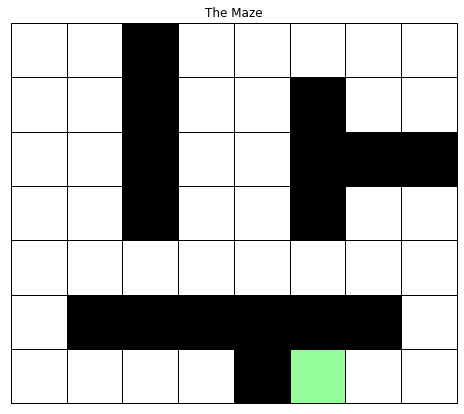

In [0]:
mz.draw_maze(maze)

## MDP formulation

We propose the following MDP formulation: 

#### State space $\mathcal{S}$

$$\mathcal{S} = \big\lbrace (i,j,k,l)\big\rbrace.$$

where i,j is the location (coordinates) of the agent and k,l is the location of the minotaur.
k,l is all coordinates in the grid and i,j does not contain the walls.



#### Action space $\mathcal{A}$

$$\mathcal{A} = \lbrace \textrm{up}, \textrm{ down}, \textrm{ left}, \textrm{ right}, \textrm{ stay} \rbrace.$$



#### Transition probabilities $\mathcal{P}$
The transition probabilities are stochastic. 
- $\mathbb{P}(Eaten \vert (i,j,k,l), a) = 1$ if i=k and j=l
- $\mathbb{P}(Win \vert (i,j,k,l), a) = 1$ if if i=6 and j=5
- $\mathbb{P}(Win \vert Win, a) = 1$ [terminal state]
- $\mathbb{P}(Eaten \vert Eaten, a) = 1$ [terminal state]
- $\mathbb{P}((i_2, j_2, k_2, l_2) \vert (i,j,k,l), a) = 1*\mathbb{P}(\textrm{minotaur moves to } k_2, l_2)$ 

#### Rewards $\mathcal{R}$
- $r(s,a) = -\infty$ if a leads to a wall
- $r(s,a) = 1$ if a leads to Win state
- $r(s,a) = 0$ for all other states

In [0]:
# Create an environment maze
env = mz.Maze(maze)
env.show()

The states are :
{0: (0, 0, 0, 0), 1: (0, 0, 0, 1), 2: (0, 0, 0, 2), 3: (0, 0, 0, 3), 4: (0, 0, 0, 4), 5: (0, 0, 0, 5), 6: (0, 0, 0, 6), 7: (0, 0, 0, 7), 8: (0, 0, 1, 0), 9: (0, 0, 1, 1), 10: (0, 0, 1, 2), 11: (0, 0, 1, 3), 12: (0, 0, 1, 4), 13: (0, 0, 1, 5), 14: (0, 0, 1, 6), 15: (0, 0, 1, 7), 16: (0, 0, 2, 0), 17: (0, 0, 2, 1), 18: (0, 0, 2, 2), 19: (0, 0, 2, 3), 20: (0, 0, 2, 4), 21: (0, 0, 2, 5), 22: (0, 0, 2, 6), 23: (0, 0, 2, 7), 24: (0, 0, 3, 0), 25: (0, 0, 3, 1), 26: (0, 0, 3, 2), 27: (0, 0, 3, 3), 28: (0, 0, 3, 4), 29: (0, 0, 3, 5), 30: (0, 0, 3, 6), 31: (0, 0, 3, 7), 32: (0, 0, 4, 0), 33: (0, 0, 4, 1), 34: (0, 0, 4, 2), 35: (0, 0, 4, 3), 36: (0, 0, 4, 4), 37: (0, 0, 4, 5), 38: (0, 0, 4, 6), 39: (0, 0, 4, 7), 40: (0, 0, 5, 0), 41: (0, 0, 5, 1), 42: (0, 0, 5, 2), 43: (0, 0, 5, 3), 44: (0, 0, 5, 4), 45: (0, 0, 5, 5), 46: (0, 0, 5, 6), 47: (0, 0, 5, 7), 48: (0, 0, 6, 0), 49: (0, 0, 6, 1), 50: (0, 0, 6, 2), 51: (0, 0, 6, 3), 52: (0, 0, 6, 4), 53: (0, 0, 6, 5), 54: (0, 0, 6, 6), 55

### Dynamic programming 

Run the following python code to obtain the optimal solution of the newly formulated MDP with dynamic programming.

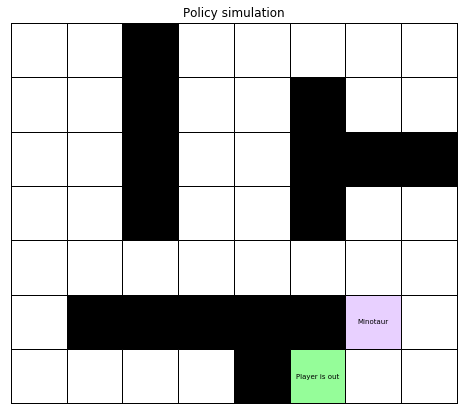

In [0]:
# Finite horizon
horizon = 20
# Solve the MDP problem with dynamic programming 
V, policy = mz.dynamic_programming(env, horizon);
# Simulate the shortest path starting from position A
method = 'DynProg';
start  = (0,0,6,5);

path = env.simulate(start, policy, method);
# for elem in path:
#   print(elem)
# Show the shortest path 
mz.animate_solution(maze, path)

b) If the minotaur is not allowed to stand still, it is never possible that the player is caught by the minotaur. This is because the minotaur will always be in an even location at an even value of t and in an odd location at each odd value of t. (where t starts at 0 (=even) and an even location is defined as the sum of the x-value and y-value is even e.g. (4,6) = 10 = even). 

The player starts at an even location and will just wait one step, then take one step at each timestep and thus always avoid the minotaur, since the player will be in an even location when the minotaur is in an odd location and vice versa.

# Problem 3: Bank Robbing (Reloaded)



In [5]:
import numpy as np
import city_lab1 as ct
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Description of the city as a numpy array
city = np.array([
    [0, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 0, 0],
    [0, 0, 0, 0]
])
# with the convention 
# 0 = empty cell
# 1 = bank

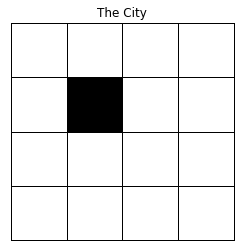

In [3]:
ct.draw_city(city)

In [3]:
# Create an environment maze
env_city = ct.City(city)
#env_city.show()

In [ ]:
Pos = ct.Pos

# Explore the MDP problem using Q learning
lambd = 0.8
n_iter = 1000000
eps = 1 # uniform exploration
player_start = Pos(0,0)
police_start = Pos(3,3)
Q, V_t = ct.q_learning(env_city, lambd, eps, player_start, police_start, n_iter)

# show the learned Q for different states in the game
player_loc = Pos(1,2)
police_loc = Pos(1,3)
s_coords = ct.State(player_loc, police_loc)
print("coords: ", s_coords)
s_coords_index = env_city.map[s_coords]
print("Learned Q values for the state where the player is at", player_loc, "and the police is at", police_loc, ":")
for index, q_action in enumerate(Q[s_coords_index,:]):
  print(env_city.actions_names[index], " : ", q_action)
#ct.draw_city(city)

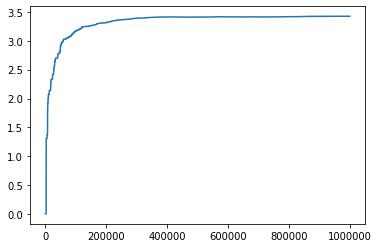

In [11]:
# plot value function for initial state over time
plt.plot(V_t);